In [1]:
import pytearcat as pt
import sympy as sy
from sympy import * 

# All geodesic motion
<hr>


In [2]:
t,r,theta,phi = pt.coords('t,r,theta,phi')

A = pt.fun('A','r,theta')
B = pt.fun('B','r,theta')
C = pt.fun('C','r,theta')
D = pt.fun('D','r,theta')
F = pt.fun('F','r,theta')
E = pt.fun('E','r,theta')
omega = pt.fun('omega','r,theta')

#Delta = A**2*B**2*C**2*D**2 + B**2*C**2*omega3**2
#Delta1 = A**2*C**2*D**2 + C**2*omega3**2
#Delta2 = A**2*D**2 + omega**2

Remember that the time coordinate must be the first coordinate.


In [3]:
ds = 'ds2 = -A**2*dt**2 + B**2*dr**2 + C**2*dtheta**2 + D**2*dphi**2 + 2*omega*dt*dphi'

g = pt.metric(ds)


Dimension = 4
Coordinates = t,r,theta,phi
Metric defined successfully: 



<IPython.core.display.Math object>

Matrix([
[-A(r, theta)**2,              0,              0, omega(r, theta)],
[              0, B(r, theta)**2,              0,               0],
[              0,              0, C(r, theta)**2,               0],
[omega(r, theta),              0,              0,  D(r, theta)**2]])

# A. The tetrad, the source and the kinematical variables

Let us choose an orthogonal unitary tetrad:
\begin{equation}
\label{TetradGen}
e^{(0)}_\alpha~=~V_\alpha, \quad 
e^{(1)}_\alpha~=~K_\alpha, \quad 
e^{(2)}_\alpha~=~L_\alpha \quad \mathrm{and}  \quad e^{(3)}_\alpha~=~S_\alpha.
\end{equation}

As usual, $\eta_{(a)(b)}= g_{\alpha\beta} e_{(a)}^\alpha e_{(b)}^\beta$, with $a=0,\,1,\,2,\,3$, i.e. latin indices label different vectors of the tetrad. 

In [4]:
Vu = pt.ten('Vu',1)
Vu.assign([1/A,0,0,0],'^')
#Vu.display('^')

Ku = pt.ten('Ku',1)
Ku.assign([0,1/B,0,0],'^')
#Ku.display('^')

Lu = pt.ten('Lu',1)
Lu.assign([0,0,1/C,0],'^')
#Lu.display('^')

Su = pt.ten('Su',1)
Su.assign([omega/(A*sqrt(A**2*D**2 + omega**2)),0,0,A/sqrt(A**2*D**2 + omega**2)],'^')
#Su.display('^')

Elements assigned correctly to the components ^
Elements assigned correctly to the components ^
Elements assigned correctly to the components ^
Elements assigned correctly to the components ^


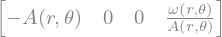

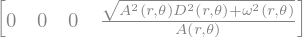

In [5]:
Vd = pt.ten('Vd',1)
Vd.assign(Vu("^mu")*g("_mu,_nu"),"_nu")
Vd.display('_')

Kd = pt.ten('Kd',1)
Kd.assign(Ku("^mu")*g("_mu,_nu"),"_nu")
Kd.simplify()
Kd.display('_')

Ld = pt.ten('Ld',1)
Ld.assign(Lu("^mu")*g("_mu,_nu"),"_nu")
Ld.simplify()
Ld.display('_')

Sd = pt.ten('Sd',1)
Sd.assign(Su("^mu")*g("_mu,_nu"),"_nu")
Sd.simplify()
Sd.display('_')

The tetrad satisfies the standard relations:
\begin{eqnarray}
V_{\alpha}V^{\alpha} &=& -K_{\alpha}K^{\alpha} = -L_{\alpha}L^{\alpha} = -S_{\alpha}S^{\alpha} = -1\,, \nonumber \\
V_{\alpha}K^{\alpha} &=& V_{\alpha}L^{\alpha} = V_{\alpha}S^{\alpha} = K_{\alpha}L^{\alpha} = K_{\alpha}S^{\alpha} = S_{\alpha}L^{\alpha} = 0\,.  \nonumber
\end{eqnarray} 

In [6]:
unoV = pt.simplify((Vu('^l')*Vd('_l')))
unoK = pt.simplify(-1*Ku('^l')*Kd('_l'))
unoL = pt.simplify(-1*Lu('^l')*Ld('_l'))
unoS = pt.simplify(-1*Su('^l')*Sd('_l'))
[unoV,unoK,unoL,unoS]

In [7]:
cero1 = pt.simplify(-1*Vu('^l')*Kd('_l'))
cero2 = pt.simplify(-1*Vu('^l')*Ld('_l'))
cero3 = pt.simplify(-1*Vu('^l')*Sd('_l'))
cero4 = pt.simplify(-1*Ku('^l')*Sd('_l'))
cero5 = pt.simplify(-1*Ku('^l')*Ld('_l'))
cero6 = pt.simplify(-1*Lu('^l')*Sd('_l'))
[cero1,cero2,cero3,cero4,cero5,cero6]

## Christoffel

In [8]:
#R = pt.riemann(All=True)
#R = pt.riemann()
Chr= pt.christoffel()

<IPython.core.display.Latex object>

  0%|          | 0/64 [00:00<?, ?it/s]

## COVARIANT DERIVATIVE OF $V_{\alpha}$

$$
V_{\alpha ; \beta}
$$


In [9]:
DcVd = pt.ten("DcVd",2)
DcVd_dat = pt.C(Vd("_alpha"),"_beta") 
DcVd.assign(DcVd_dat,"_alpha,_beta")
DcVd.factor()
#DcVd.display()
DcVd.complete('_,_')

DcVd Tensor $DcVd{^\alpha}{_\beta}$:   0%|          | 0/16 [00:00<?, ?it/s]

DcVd Tensor $DcVd{^\alpha}{^\beta}$:   0%|          | 0/16 [00:00<?, ?it/s]

DcVd Tensor $DcVd{_\alpha}{^\beta}$:   0%|          | 0/16 [00:00<?, ?it/s]

<IPython.core.display.Latex object>

In [10]:
# Aceleracion y su derivada covariante
ad= pt.ten("ad",1)
ad.assign( DcVd("_alpha,_beta")*Vu("^beta") ,"_alpha")
ad.simplify()
#ad.display('_')

Dcad = pt.ten("Dcad",2)
Dcad_dat = pt.C(ad("_alpha"),"_beta") 
Dcad.assign(Dcad_dat,"_alpha,_beta")
Dcad.simplify()
#Dcad.display()

$$
K_{\alpha ; \beta}
$$

In [11]:
DcKd = pt.ten("DcKd",2)
DcKd_dat = pt.C(Kd("_alpha"),"_beta") 
DcKd.assign(DcKd_dat,"_alpha,_beta")
DcKd.simplify()
#DcKd.display()
#DcKd.complete('_,_')

$$
L_{\alpha ; \beta}
$$

In [12]:
DcLd = pt.ten("DcLd",2)
DcLd_dat = pt.C(Ld("_alpha"),"_beta") 
DcLd.assign(DcLd_dat,"_alpha,_beta")
DcLd.simplify()
#DcLd.display()
#DcLd.complete('_,_')

$$
S_{\alpha ; \beta}
$$

In [13]:
DcSd = pt.ten("DcSd",2)
DcSd_dat = pt.C(Sd("_alpha"),"_beta") 
DcSd.assign(DcSd_dat,"_alpha,_beta")
DcSd.factor()
#DcSd.display()
#DcSd.complete('_,_')

## Escalares Cinemáticos


$$
a_1= a_\mu K^\mu \,,\quad  a_2= a_\mu L^\mu \,, \quad  a_3= a_\mu S^\mu 
$$

In [14]:
a1=pt.simplify(ad("_mu")*Ku("^mu"))
a2=pt.simplify(ad("_mu")*Lu("^mu"))
a3=pt.simplify(ad("_mu")*Su("^mu"))
#display([a1,a2,a3])

Dca1 = pt.ten("Dca1",1)
Dca1_dat = pt.C(a1,"_alpha") 
Dca1.assign(Dca1_dat,"_alpha")
Dca1.factor()
#Dca1.display()
Dca1.complete('_,_')

Dca2 = pt.ten("Dca2",1)
Dca2_dat = pt.C(a2,"_alpha") 
Dca2.assign(Dca2_dat,"_alpha")
Dca2.factor()
#Dca2.display()
Dca2.complete('_,_')

Dca1 Tensor $Dca1{^\alpha}$:   0%|          | 0/4 [00:00<?, ?it/s]

<IPython.core.display.Latex object>

Dca2 Tensor $Dca2{^\alpha}$:   0%|          | 0/4 [00:00<?, ?it/s]

<IPython.core.display.Latex object>

$$ 
j_1=K_{\mu;\nu} K^\mu L^\nu \,, \quad j_2=K_{\mu;\nu} L^\mu L^\nu \,,\quad j_3 =K_{\mu;\nu} L^\mu S^\nu \,,\quad  j_4=K_{\mu;\nu} S^\mu K^\nu \,, \quad j_5=K_{\mu;\nu} S^\mu L^\nu \,,\quad j_6 =K_{\mu;\nu} S^\mu S^\nu \,,
$$

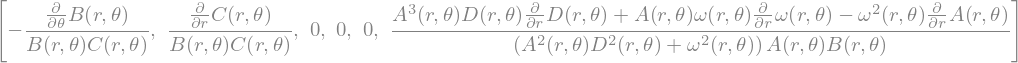

In [15]:
j1= pt.simplify(DcKd("_mu,_nu")*Lu("^mu")*Ku("^nu"))
j2= pt.simplify(DcKd("_mu,_nu")*Lu("^mu")*Lu("^nu"))
j3= pt.simplify(DcKd("_mu,_nu")*Lu("^mu")*Su("^nu"))
j4= pt.simplify(DcKd("_mu,_nu")*Su("^mu")*Ku("^nu"))
j5= pt.simplify(DcKd("_mu,_nu")*Su("^mu")*Lu("^nu"))
j6= pt.simplify(DcKd("_mu,_nu")*Su("^mu")*Su("^nu"))

j7= pt.simplify(DcLd("_mu,_nu")*Su("^mu")*Ku("^nu"))
j8= pt.simplify(DcLd("_mu,_nu")*Su("^mu")*Lu("^nu"))
j9= pt.simplify(DcLd("_mu,_nu")*Su("^mu")*Su("^nu"))


[j1,j2,j3,j4,j5,j6]

$$ 
j_7=L_{\mu;\nu} S^\mu K^\nu \,,\quad  j_8=L_{\mu;\nu} S^\mu L^\nu \,, \quad  j_9 =S_{\mu;\nu} L^\mu S^\nu 
$$

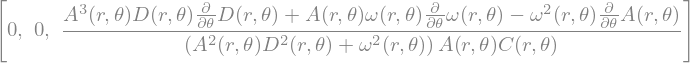

In [16]:
[j7,j8,j9]

In [17]:
Omed = pt.ten("Omed",2)
Omed.assign((DcVd("_mu,_nu")-DcVd("_nu,_mu")+ad("_mu")*Vd("_nu")-ad("_nu")*Vd("_mu"))/2,"_mu,_nu")
#Omed.assign((DcVd("_mu,_nu")-DcVd("_nu,_mu"))/2,"_mu,_nu")
Omed.factor()
#Omed.display(aslist=True)
#Omed.display()

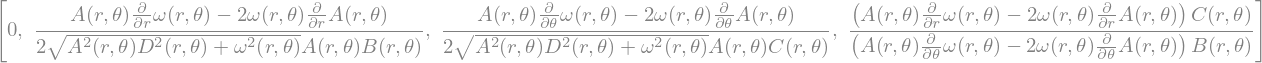

In [18]:
Omega1= pt.factor(Omed("_mu,_nu")*Ku("^mu")*Lu("^nu"))
Omega2= pt.factor(Omed("_mu,_nu")*Su("^mu")*Ku("^nu"))
Omega3= pt.factor(Omed("_mu,_nu")*Su("^mu")*Lu("^nu"))
Omega = pt.simplify(Omega2/Omega3)
[Omega1,Omega2,Omega3,Omega]

In [19]:
sigma1=0
sigma2=0
sigma3=0
sh = pt.ten("sh",2) 
sh.assign(sigma1*Kd("_alpha")*Kd("_beta") + sigma2*Ld("_alpha")*Ld("_beta")- \
          (sigma1-sigma2)*Sd("_alpha")*Sd("_beta") ,"_alpha,_beta")
sh.simplify()
#sh.display()

In [20]:
Theta=DcVd("^alpha,_alpha")
#display(Theta)

In [21]:
hdd=pt.ten("hdd",2)
hdd.assign(g("_mu,_nu")+Vd('_mu')*Vd('_nu') ,"_mu,_nu")
hdd.simplify()
#hdd.display('_,_')
hdd.complete('_,_')

hdd Tensor $hdd{^\alpha}{_\beta}$:   0%|          | 0/16 [00:00<?, ?it/s]

hdd Tensor $hdd{^\alpha}{^\beta}$:   0%|          | 0/16 [00:00<?, ?it/s]

hdd Tensor $hdd{_\alpha}{^\beta}$:   0%|          | 0/16 [00:00<?, ?it/s]

<IPython.core.display.Latex object>

$$
\begin{aligned}
\Omega_{\alpha \beta} &=
\Omega_{1}\left(K_{\alpha} L_{\beta} - K_{\beta} L_{\alpha}\right)+
\Omega_{2}\left(S_{\alpha} K_{\beta} - S_{\beta} K_{\alpha} \right) +
\Omega_{3}\left(S_{\alpha} L_{\beta} - S_{\beta} L_{\alpha}\right)
\end{aligned}
$$

In [22]:
OmedS = pt.ten("OmedS",2)
OmedS.assign(Omega1*(Kd("_mu")*Ld("_nu") - Kd("_nu")*Ld("_mu")) \
             + Omega2*(Sd("_mu")*Kd("_nu") - Sd("_nu")*Kd("_mu")) \
             + Omega3*(Sd("_mu")*Ld("_nu") - Sd("_nu")*Ld("_mu")),"_mu,_nu")
OmedS.factor()
#Omed.display(aslist=True)
#OmedS.display()

$$
\Omega_{\alpha} =
\Omega_{3} K_{\alpha} +
\Omega_{2} L_{\alpha} +
\Omega_{1} S_{\alpha} 
$$

In [23]:
Omd=pt.ten("Omd",1)
Omd.assign(Omega3*Kd("_mu")-Omega2*Ld("_mu") + Omega1*Sd("_mu"),"_mu")
Omd.simplify()
#Omd.display('_')

$$
V_{\alpha ; \beta}=-a_{\alpha} V_{\beta}+\sigma_{\alpha \beta}+\Omega_{\alpha \beta}+\frac{1}{3} \Theta h_{\alpha \beta}
$$

In [24]:
DcVdS = pt.ten("DcVdS",2) 
DcVdS.assign(-1*ad("_alpha")*Vd("_beta") + sh("_alpha,_beta") + OmedS("_alpha,_beta")\
             +Theta*hdd("_alpha,_beta")/3  ,"_alpha,_beta")
DcVdS.factor()
#DcVdS.display()

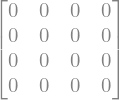

In [25]:
ceros=pt.ten("ceros",2)
ceros.assign(DcVd("_alpha,_beta")-DcVdS("_alpha,_beta") ,"_alpha,_beta")
ceros.simplify()
#DcVd.display()
ceros.display('_,_')

$$
K_{\alpha ; \beta}=-a_{\mu} K^{\mu} V_{\alpha} V_{\beta}+V_{\alpha}\left(\sigma_{\nu \beta}+\Omega_{\nu \beta}+\frac{1}{3} \Theta h_{\nu \beta}\right) K^{\nu}-\tilde{a}_{\alpha}^{(k)} V_{\beta}+J_{\alpha \beta}^{(k)}
$$

In [26]:
akd=pt.ten("akd",1)
# Es con  + 
akd.assign(-Omega1*Ld("_mu") + Omega2*Sd("_mu"),"_mu")
akd.factor()
#akd.display('_')

In [27]:
akdp=pt.ten("akdp",1)
akdp.assign( hdd("^mu,_alpha")*DcKd("_mu,_nu")*Vu("^nu"),"_alpha")
akdp.factor()
#akdp.display('_')

In [28]:
Jkd=pt.ten("Jkd",2)
Jkd.assign( (j1*Kd("_nu") + j2*Ld("_nu") + j3*Sd("_nu"))*Ld("_mu") \
           +(j4*Kd("_nu") + j5*Ld("_nu") + j6*Sd("_nu"))*Sd("_mu") ,"_mu,_nu")
Jkd.simplify()
#Jkd.display('_,_')

In [29]:
Jkdp=pt.ten("Jkdp",2)
Jkdp.assign( hdd("^mu,_alpha")*hdd("^nu,_beta")*DcKd("_mu,_nu")  ,"_alpha,_beta")
Jkdp.simplify()
#Jkdp.display('_,_')

In [30]:
DcKdS = pt.ten("DcKdS",2) 
DcKdS.assign(-1*ad("_mu")*Ku("^mu")*Vd("_alpha")*Vd("_beta")  \
             + Vd("_alpha")*( sh("_mu,_beta") + OmedS("_mu,_beta") + Theta*hdd("_mu,_beta")/3)*Ku("^mu") \
             - akd("_alpha")*Vd("_beta") + Jkd("_alpha,_beta")  ,"_alpha,_beta")
DcKdS.factor()
#DcKdS.display()

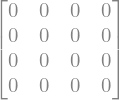

In [31]:
ceros=pt.ten("ceros",2)
ceros.assign(DcKd("_alpha,_beta")-DcKdS("_alpha,_beta") ,"_alpha,_beta")
ceros.simplify()
ceros.display('_,_')

$$
L_{\alpha ; \beta}=-a_{\mu} L^{\mu} V_{\alpha} V_{\beta}+V_{\alpha}\left(\sigma_{\nu \beta}+\Omega_{\nu \beta}+\frac{1}{3} \Theta h_{\nu \beta}\right) L^{\nu}-\tilde{a}_{\alpha}^{(l)} V_{\beta}+J_{\alpha \beta}^{(l)}
$$

In [32]:
ald=pt.ten("ald",1)
# Es con  + 
ald.assign(Omega1*Kd("_mu") + Omega3*Sd("_mu"),"_mu")
ald.factor()
#ald.display('_')

aldp=pt.ten("aldp",1)
aldp.assign( hdd("^mu,_alpha")*DcLd("_mu,_nu")*Vu("^nu"),"_alpha")
aldp.factor()
#aldp.display('_')

In [33]:
Jld=pt.ten("Jld",2)
Jld.assign( -1*(j1*Kd("_nu") + j2*Ld("_nu") + j3*Sd("_nu"))*Kd("_mu") \
           +(j7*Kd("_nu") + j8*Ld("_nu") + j9*Sd("_nu"))*Sd("_mu") ,"_mu,_nu")
Jld.simplify()
#Jld.display('_,_')

In [34]:
DcLdS = pt.ten("DcLdS",2) 
DcLdS.assign(-1*ad("_mu")*Lu("^mu")*Vd("_alpha")*Vd("_beta")  \
             + Vd("_alpha")*( sh("_mu,_beta") + OmedS("_mu,_beta") + Theta*hdd("_mu,_beta")/3)*Lu("^mu") \
             - ald("_alpha")*Vd("_beta") + Jld("_alpha,_beta")  ,"_alpha,_beta")
DcLdS.factor()
#DcLdS.display()

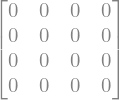

In [35]:
ceros=pt.ten("ceros",2)
ceros.assign(DcLd("_alpha,_beta")-DcLdS("_alpha,_beta") ,"_alpha,_beta")
ceros.simplify()
ceros.display('_,_')

$$
S_{\alpha ; \beta}=-a_{\mu} S^{\mu} V_{\alpha} V_{\beta}+V_{\alpha}\left(\sigma_{\nu \beta}+\Omega_{\nu \beta}+\frac{1}{3} \Theta h_{\nu \beta}\right) S^{\nu}-\tilde{a}_{\alpha}^{(s)} V_{\beta}+J_{\alpha \beta}^{(s)}
$$

In [36]:
asd=pt.ten("asd",1)
# Es con  + 
asd.assign(-Omega2*Kd("_mu") - Omega3*Ld("_mu"),"_mu")
asd.factor()
#asd.display('_')

asdp=pt.ten("asdp",1)
asdp.assign( hdd("^mu,_alpha")*DcSd("_mu,_nu")*Vu("^nu"),"_alpha")
asdp.factor()
#asdp.display('_')

In [37]:
Jsd=pt.ten("Jsd",2)
Jsd.assign( -1*(j4*Kd("_nu") + j5*Ld("_nu") + j6*Sd("_nu"))*Kd("_mu") \
           -(j7*Kd("_nu") + j8*Ld("_nu") + j9*Sd("_nu"))*Ld("_mu") ,"_mu,_nu")
Jsd.simplify()
#Jsd.display('_,_')

In [38]:
DcSdS = pt.ten("DcSdS",2) 
DcSdS.assign(-1*ad("_mu")*Su("^mu")*Vd("_alpha")*Vd("_beta")  \
             + Vd("_alpha")*( sh("_mu,_beta") + OmedS("_mu,_beta") + Theta*hdd("_mu,_beta")/3)*Su("^mu") \
             - asd("_alpha")*Vd("_beta") + Jsd("_alpha,_beta")  ,"_alpha,_beta")
DcSdS.factor()
#DcSdS.display()

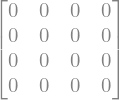

In [39]:
ceros=pt.ten("ceros",2)
ceros.assign(DcSd("_alpha,_beta")-DcSdS("_alpha,_beta") ,"_alpha,_beta")
ceros.simplify()
ceros.display('_,_')

In [40]:
R = pt.riemann(All=True)

<IPython.core.display.Latex object>

  0%|          | 0/256 [00:00<?, ?it/s]

Riemann Tensor $R{_\alpha}{_\beta}{_\gamma}{_\delta}$:   0%|          | 0/256 [00:00<?, ?it/s]

Riemann Tensor $R{^\alpha}{^\beta}{_\gamma}{_\delta}$:   0%|          | 0/256 [00:00<?, ?it/s]

Riemann Tensor $R{^\alpha}{^\beta}{^\gamma}{_\delta}$:   0%|          | 0/256 [00:00<?, ?it/s]

Riemann Tensor $R{^\alpha}{^\beta}{^\gamma}{^\delta}$:   0%|          | 0/256 [00:00<?, ?it/s]

Riemann Tensor $R{^\alpha}{^\beta}{_\gamma}{^\delta}$:   0%|          | 0/256 [00:00<?, ?it/s]

Riemann Tensor $R{^\alpha}{_\beta}{^\gamma}{_\delta}$:   0%|          | 0/256 [00:00<?, ?it/s]

Riemann Tensor $R{^\alpha}{_\beta}{^\gamma}{^\delta}$:   0%|          | 0/256 [00:00<?, ?it/s]

Riemann Tensor $R{^\alpha}{_\beta}{_\gamma}{^\delta}$:   0%|          | 0/256 [00:00<?, ?it/s]

Riemann Tensor $R{_\alpha}{^\beta}{_\gamma}{_\delta}$:   0%|          | 0/256 [00:00<?, ?it/s]

Riemann Tensor $R{_\alpha}{^\beta}{^\gamma}{_\delta}$:   0%|          | 0/256 [00:00<?, ?it/s]

Riemann Tensor $R{_\alpha}{^\beta}{^\gamma}{^\delta}$:   0%|          | 0/256 [00:00<?, ?it/s]

Riemann Tensor $R{_\alpha}{^\beta}{_\gamma}{^\delta}$:   0%|          | 0/256 [00:00<?, ?it/s]

Riemann Tensor $R{_\alpha}{_\beta}{^\gamma}{_\delta}$:   0%|          | 0/256 [00:00<?, ?it/s]

Riemann Tensor $R{_\alpha}{_\beta}{^\gamma}{^\delta}$:   0%|          | 0/256 [00:00<?, ?it/s]

Riemann Tensor $R{_\alpha}{_\beta}{_\gamma}{^\delta}$:   0%|          | 0/256 [00:00<?, ?it/s]

<IPython.core.display.Latex object>

In [41]:
Ric = pt.ricci()
Ric.complete('_,_')

<IPython.core.display.Latex object>

  0%|          | 0/16 [00:00<?, ?it/s]

Ricci Tensor $R{^\alpha}{_\beta}$:   0%|          | 0/16 [00:00<?, ?it/s]

Ricci Tensor $R{^\alpha}{^\beta}$:   0%|          | 0/16 [00:00<?, ?it/s]

Ricci Tensor $R{_\alpha}{^\beta}$:   0%|          | 0/16 [00:00<?, ?it/s]

<IPython.core.display.Latex object>

In [42]:
Res = pt.riccis()

  0%|          | 0/16 [00:00<?, ?it/s]

<IPython.core.display.Latex object>

In [43]:
KD= pt.kdelta()

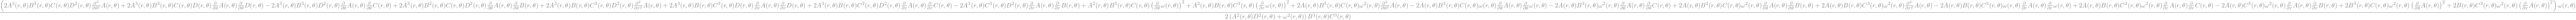

In [44]:
Cud=pt.ten("Cud",4)
#Cud.assign( R("^nu,_alpha,_beta,_mu") - Ric("^nu,_beta")*g("_alpha,_mu")/2  \
#           + Ric("_alpha,_beta")*KD("^nu,_mu")/2 - Ric("_alpha,_mu")*KD("^nu,_beta")/2 \
#           + Ric("^nu,_mu")*g("_alpha,_beta")/2  \
#           + Res*(KD("^nu,_beta")*g("_alpha,_mu") - g("_alpha,_beta")*KD("^nu,_mu"))/6, "^nu,_alpha,_beta,_mu")      
#
Cud.assign(R("_alpha,_beta,_mu,_nu") \
           - g("_alpha,_mu")*Ric("_nu,_beta")/2 \
           + g("_alpha,_nu")*Ric("_mu,_beta")/2 \
           + g("_beta,_mu")*Ric("_nu,_alpha")/2 \
           + g("_beta,_nu")*Ric("_mu,_alpha")/2 \
           + Res*(g("_alpha,_mu")*g("_nu,_beta")/2 - g("_alpha,_nu")*g("_mu,_beta")/2 )/3 , "_alpha,_beta,_mu,_nu")
Cud.simplify()
#Cud.complete('^,_,_,_')
Cud("_0,_0,_0,_3")

In [45]:
Ed = pt.ten("Ed",4) 
Ed.assign(Cud("_alpha,_beta,_mu,_nu")-R("_alpha,_beta,_mu,_nu")  ,"_alpha,_beta,_mu,_nu")
Ed.simplify()
#Ed.display()

## Electric part of Weyl tensor
$$
\begin{aligned}
E_{\alpha \beta} &=E_{1} K_{\alpha} K_{\beta}+E_{2} L_{\alpha} L_{\beta}-\left(E_{1}+E_{2}\right) S_{\alpha} S_{\beta} +E_{3} K_{(\alpha} L_{\beta)}+E_{4} K_{(\alpha} S_{\beta)}+E_{5} L_{(\alpha} S_{\beta)} \\
E_{\alpha \beta} &=a_{\alpha} a_{\beta}+h_{(\alpha}^{\mu} h_{\beta)}^{\nu} a_{\nu ; \mu}+\Omega^{2} h_{\alpha \beta}-\Omega_{\alpha} \Omega_{\beta}
\end{aligned}
$$

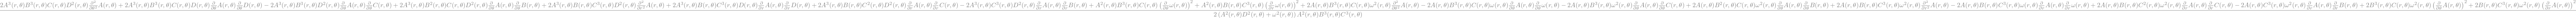

In [46]:
E1= -a2*j1+a1*j2+a1*j6+a2*j9 + a1**2 + a2**2 + a3**2 + 2*Omega2**2 + 2*Omega3**2 + Kd("_mu")*Dca1("^mu") + Ld("_mu")*Dca2("^mu")
E1.factor()

In [47]:
EdS = pt.ten("EdS",2) 
EdS.assign(ad("_alpha")*ad("_beta") + \
           ((hdd("^mu,_alpha")*hdd("^nu,_beta") + hdd("_alpha,^mu")*hdd("_beta,^nu"))/2 )*Dcad("_nu,_mu") +\
           Omega**2*hdd("_alpha,_beta") - Omd("_alpha")*Omd("_beta"),"_alpha,_beta")
EdS.simplify()
#EdS.display(aslist=True)

In [48]:
EdS2 = pt.ten("EdS2",2) 
EdS.assign(Cud("_alpha,_beta,_mu,_nu")*Vu("^mu")*Vu("^nu") ,"_alpha,_beta")
EdS.simplify()